### Progect 4. Tardigrades: from genestealers to space marines

In [6]:
from IPython.display import Image

First of all I downloaded assembled genome of the Ramazzottius varieornatus from ftp://ftp.ncbi.nlm.nih.gov/genomes/all/.

In [2]:
!pwd

/Users/olgamazur/bioinf/project-4


In [4]:
!ls

GCA_001949185.1_Rvar_4.0_genomic.fna lab_journal.ipynb


Next I tried to use RepeatMasker, but see a notification about rescinding their working agreement.

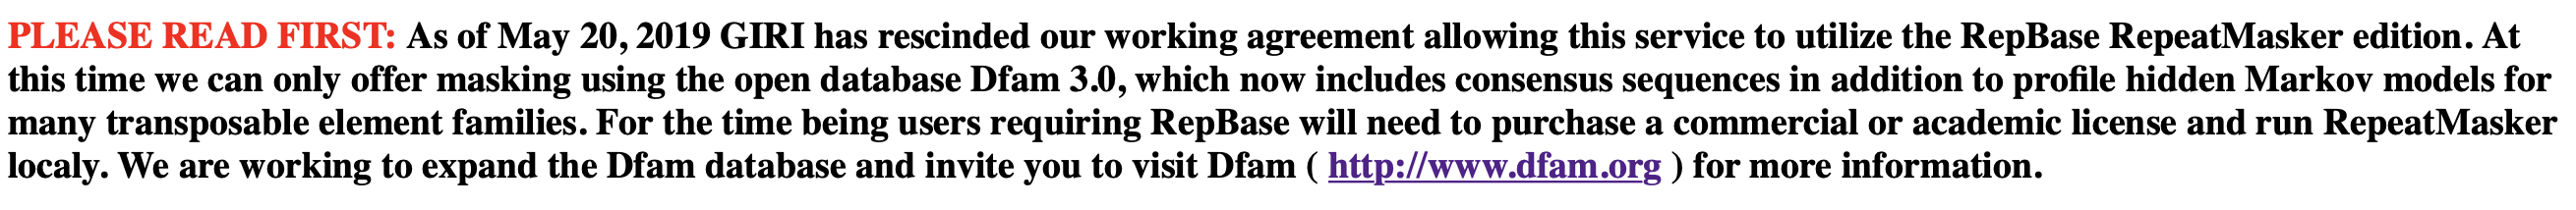

In [7]:
Image(filename='Screenshorts/1.png')

When I tried to select a sequence file, site interrupted my connection and restarted. So I tried to insert some part of the sequence, select C.elegans in DNA source and submitted sequence. I received this result:

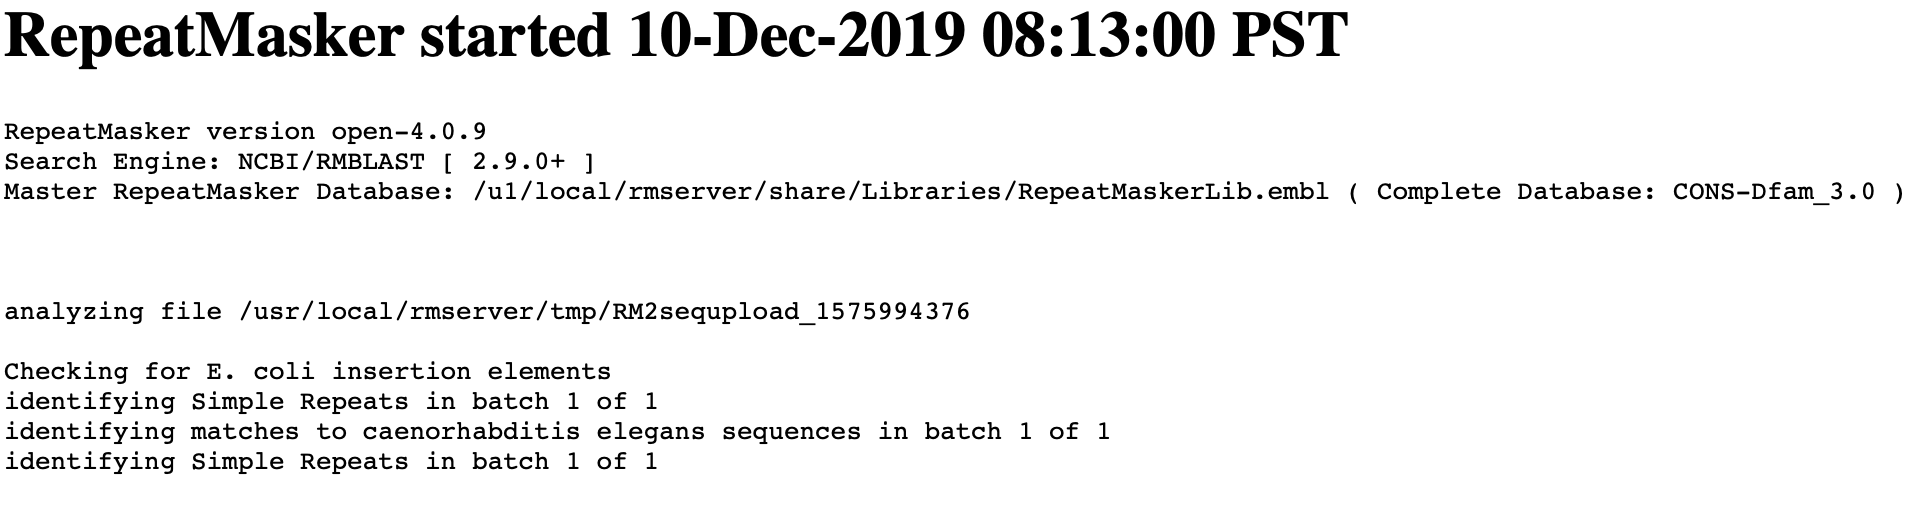

In [8]:
Image(filename='Screenshorts/2.png')

In the second step, I used the phyloT service: the purpose was to find someone closer to tardigrades. So I inputted  animal species from http://bioinf.uni-greifswald.de/augustus/ to the phyloT. Because Xipophorus maculatus and Drosophila melagonaster were not supported, they were not in my search and the limit of species was 10. I divided species for several groups and I got the following results:

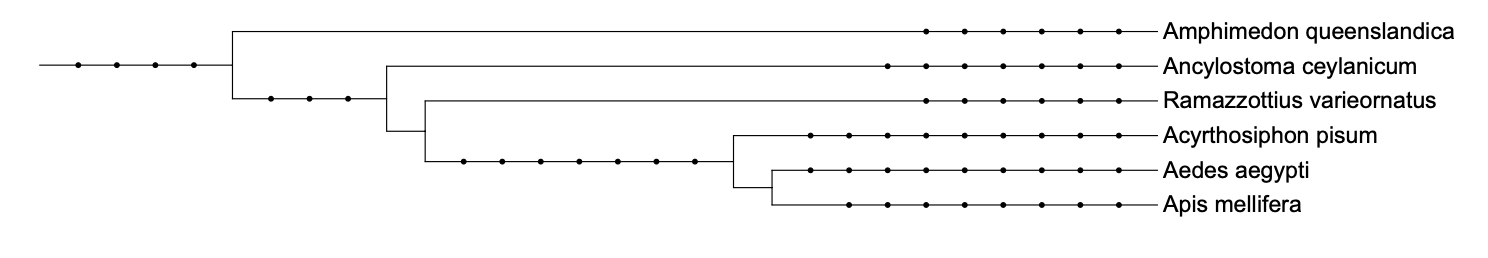

In [15]:
Image(filename='Screenshorts/3.png')

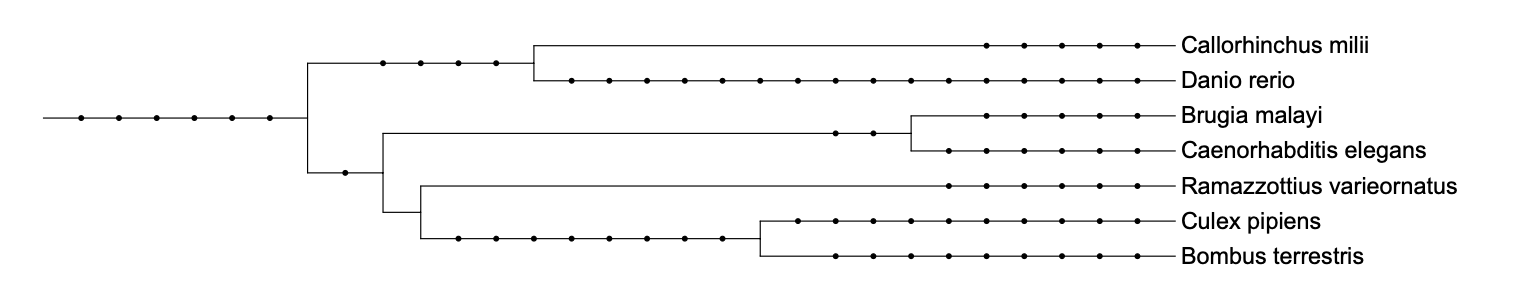

In [16]:
Image(filename='Screenshorts/4.png')

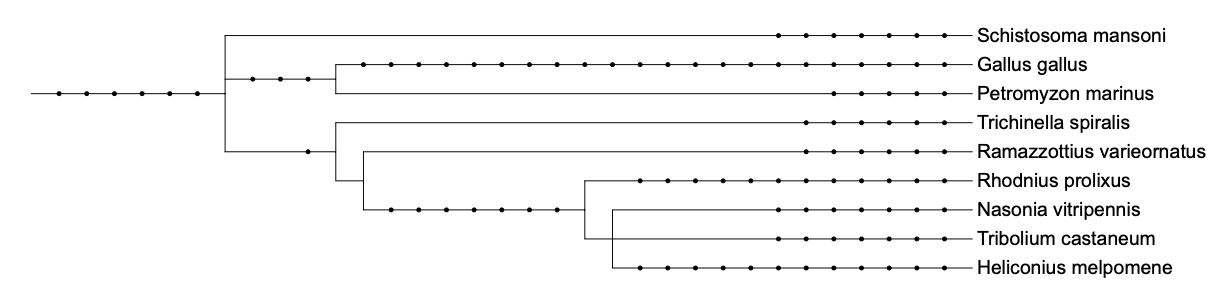

In [17]:
Image(filename='Screenshorts/5.png')

So we can see that the closest species was Trichinella spiralis. This species was used for searching in AUGUSTUS. After filling the form genome of Ramazzottius varieornatus was sent to service. Since several hours AUGUSTUS send the answer on e-mail in tar.gz. format.

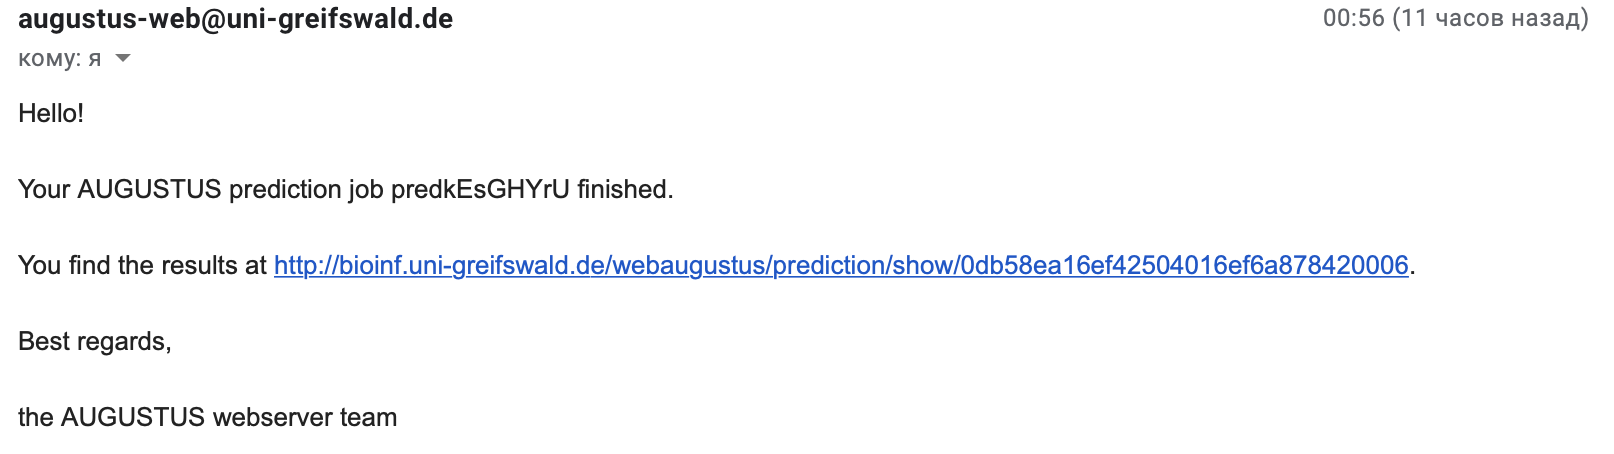

In [18]:
Image(filename='Screenshorts/6.png')

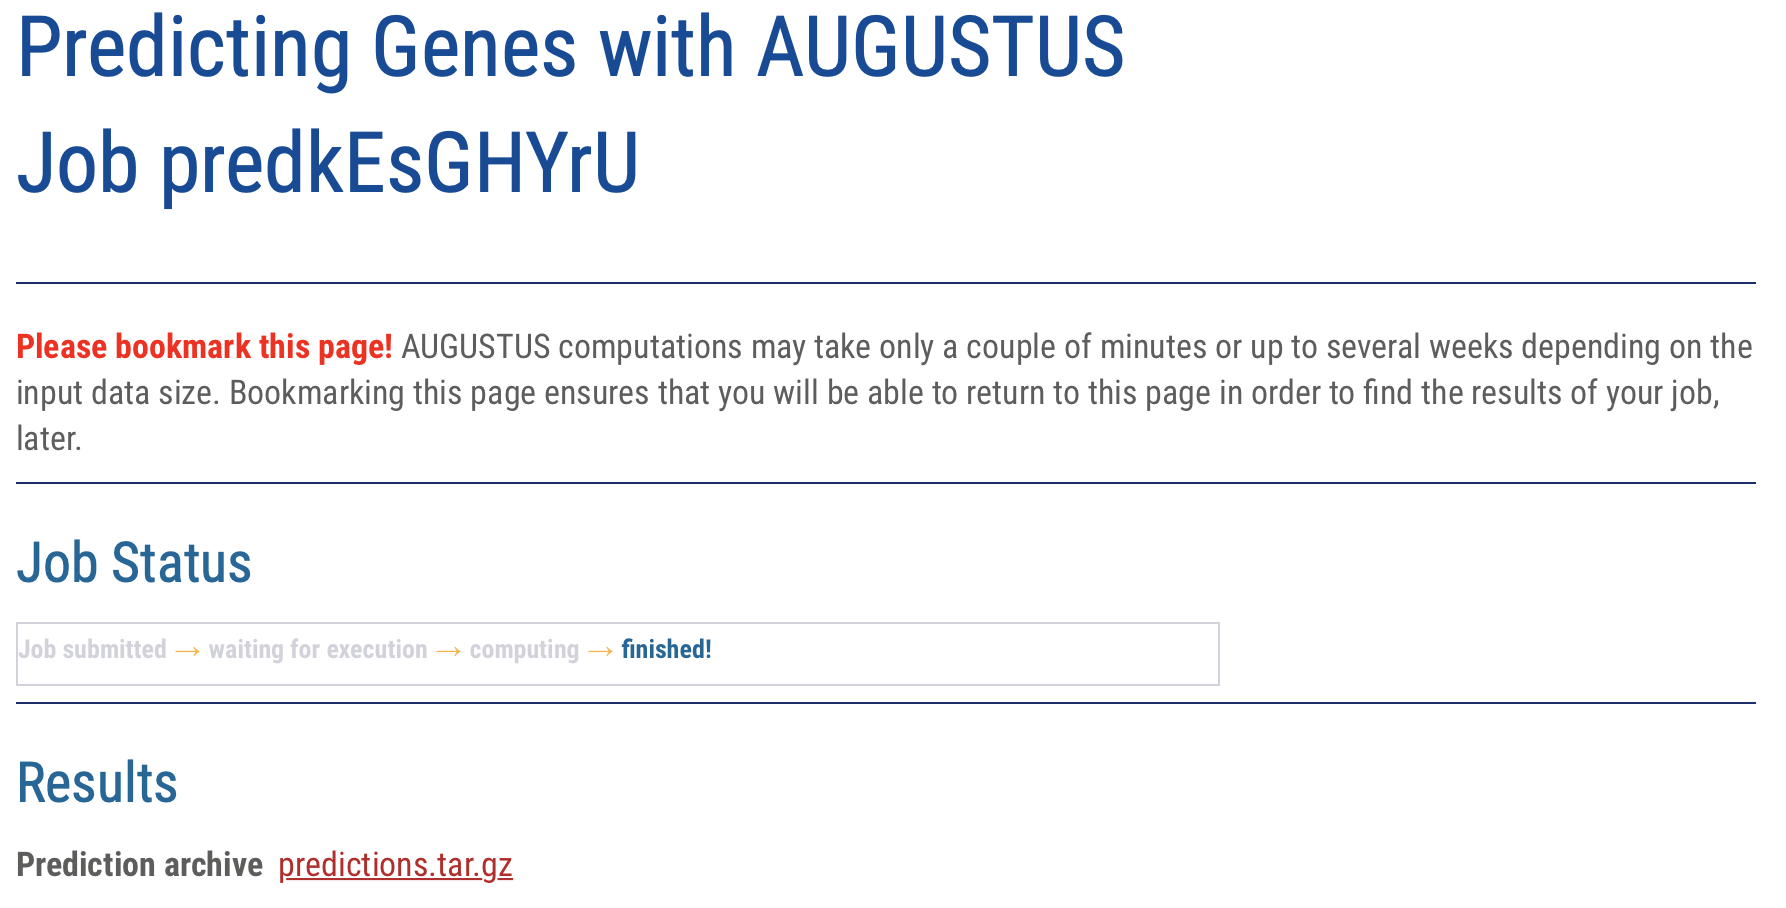

In [19]:
Image(filename='Screenshorts/7.png')

#### Functional annotation

In [20]:
!perl getAnnoFasta.pl.css augustus.gff 

In [22]:
!grep -o '>' augustus.aa | wc -l

   16435


So we got the number of obtained proteins and it was 16435.

#### Physical localization

The next step was downloaded a list with of peptides that were associated with the DNA.

In [27]:
!makeblastdb -in augustus.fna -title "MY_DB" -dbtype prot



Building a new DB, current time: 12/12/2019 15:25:32
New DB name:   /Users/olgamazur/bioinf/project-4/augustus.fna
New DB title:  MY_DB
Sequence type: Protein
Deleted existing Protein BLAST database named /Users/olgamazur/bioinf/project-4/augustus.fna
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 16435 sequences in 0.449626 seconds.


In [60]:
!blastp -query peptides.txt -db augustus.fna -outfmt "6 qacc sacc qseq sseq pident length mismatch gapopen qstart qend sstart send evalue bitscore"> table.tsv

In [61]:
import pandas as pd

In [62]:
blast_result = pd.read_csv('table.tsv', sep='\t', index_col=0, names=['Sample', 'sacc', 'qseq', 'sseq', 'pident', 'length', 'mismatch',
                                                                   'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore'])

In [63]:
blast_result.sort_values('Sample')

,sacc,qseq,sseq,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
Sample,,,,,,,,,,,,,
pept_10_score_56,g3428.t1,GPEDEAGGPPK,GPEDEAGGPPK,100.000,11,0,0,1,11,160,170,0.055,26.2
pept_10_score_56,g11513.t1,PEDEAGGP,PEDPAGGP,87.500,8,1,0,2,9,872,879,8.300,20.0
pept_11_score_48,g3428.t1,LTDDELNQAMK,LTDDELNQAMK,100.000,11,0,0,1,11,129,139,0.110,25.4
pept_12_score_44,g5616.t1,AATGAVQSSASK,AATGAVQSSASK,100.000,12,0,0,1,12,155,166,0.420,23.9
pept_13_score_48,g5616.t1,VLLDNQDDYELK,VLLDNQDDYELK,100.000,12,0,0,1,12,143,154,0.026,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
pept_8_score_81,g4970.t1,GGVNTEATGDNYIR,GNVNTQPTAMNYYR,57.143,14,6,0,5,18,134,147,8.800,20.4
pept_9_score_81,g10513.t1,QGGMGMSGGMGGADR,QGGMGMSGGMGGADR,100.000,15,0,0,1,15,305,319,0.003,30.0
pept_9_score_81,g11806.t1,QGGMGMSGGMGGADR,QGGMGMPDFVGGSDR,66.667,15,5,0,1,15,152,166,3.900,21.2


In [57]:
blast_result.to_csv(r'blast.csv')

Filter the table and save to the result.rtf file sequences with the best match of length and e-value.

a) The result from WoLF PSORT save in 'wolf_result.html'. 

b) The result from TargetP-2.0 save in 'result_TargetP-2.0.html'

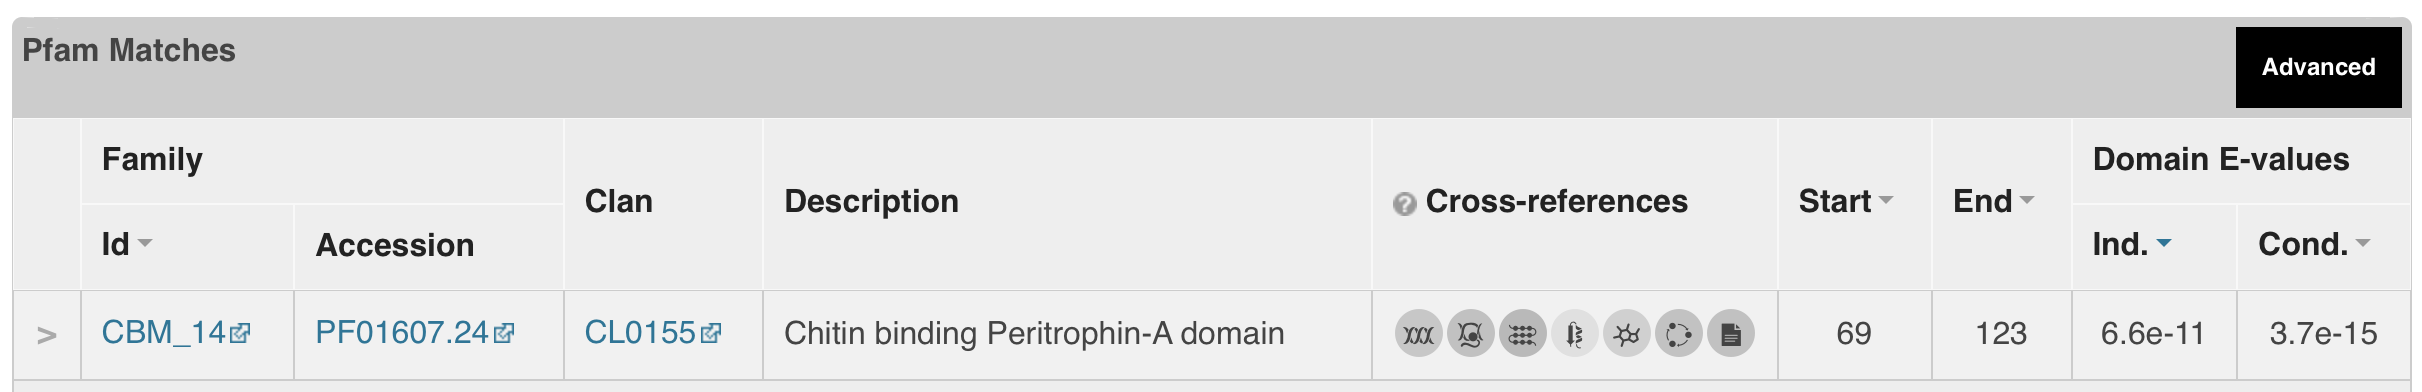

In [64]:
Image(filename='Screenshorts/9.png')

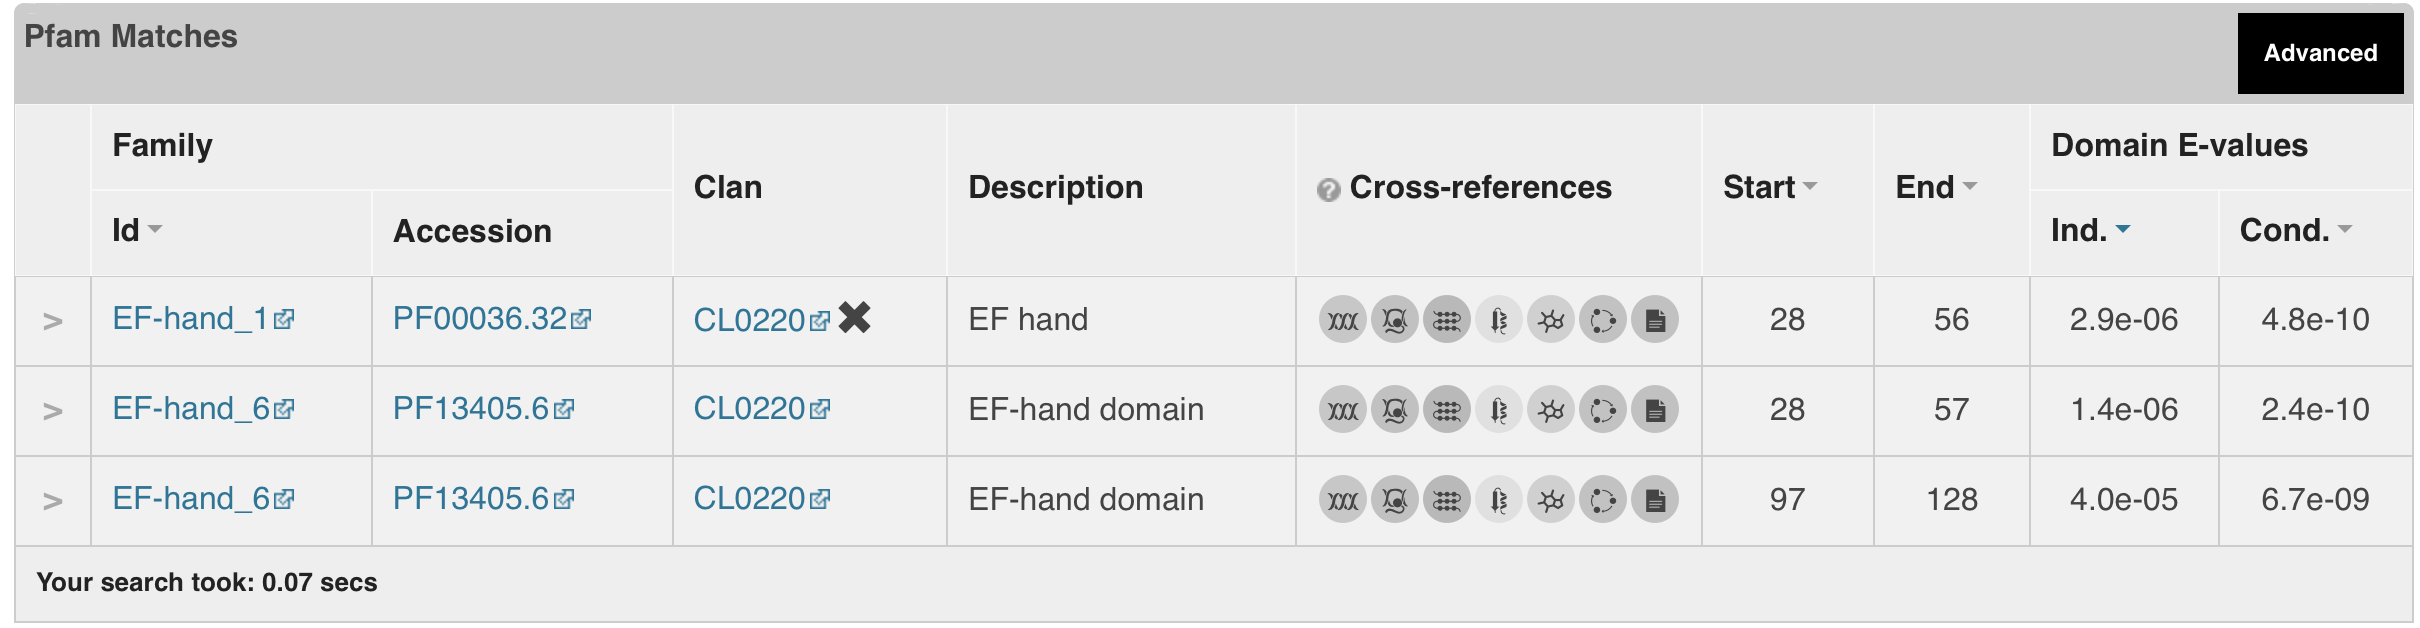

In [65]:
Image(filename='Screenshorts/10.png')

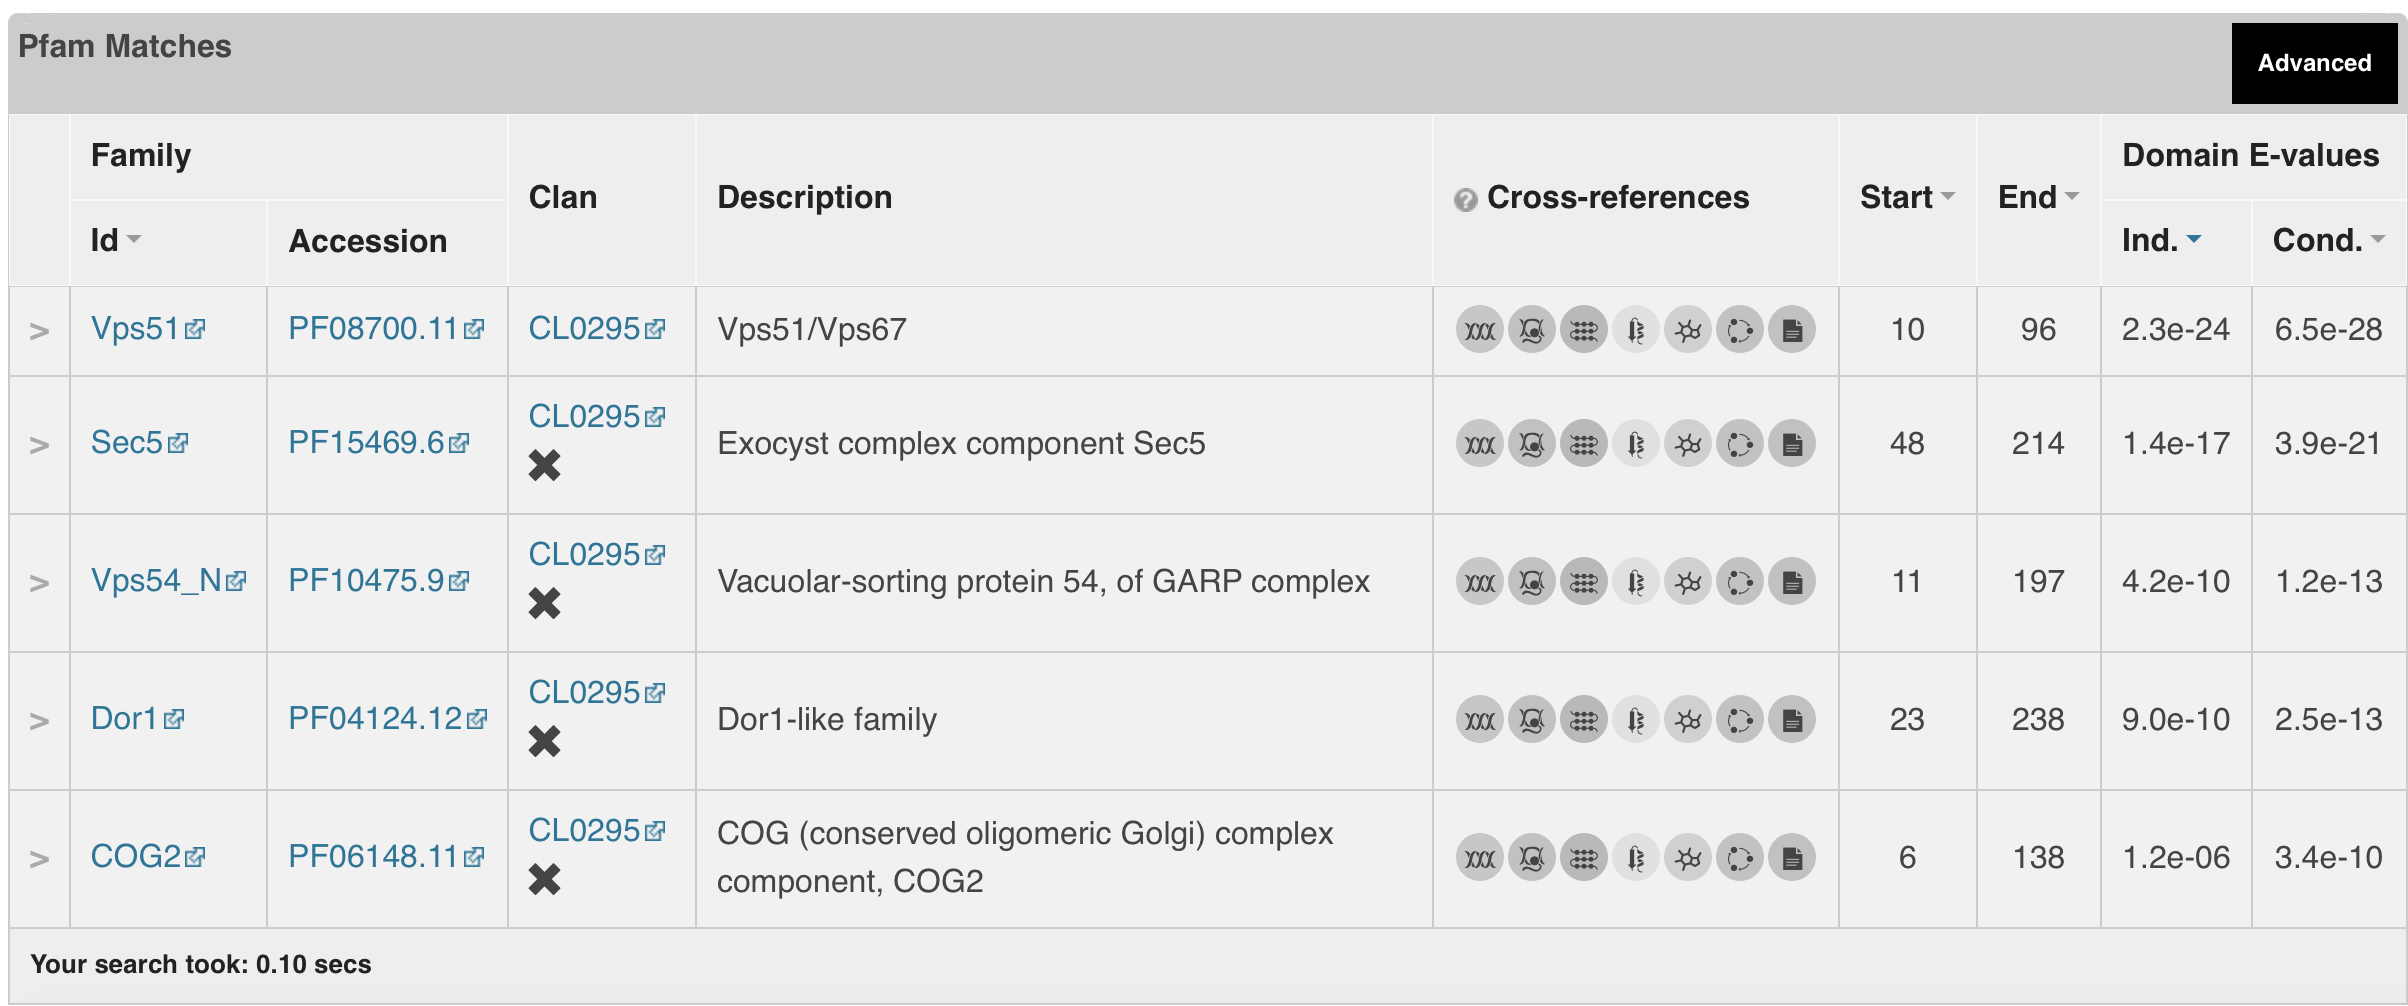

In [66]:
Image(filename='Screenshorts/11.png')